# import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline , make_pipeline

# Load Dataset

In [15]:
df = pd.read_csv("personality_datasert.csv")

In [17]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# Splitting

In [22]:
x = df.iloc[:,:-1]

In [24]:
y = df.iloc[:,-1]

In [26]:
y

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42) 

In [30]:
print("shape of x_train = ", x_train.shape)
print("shape of x_test = ", x_test.shape)

shape of x_train =  (2320, 7)
shape of x_test =  (580, 7)


# Preprocessing

In [34]:
# label Encoder 
le = LabelEncoder()
y_le = le.fit_transform(y)


In [36]:
y_le

array([0, 1, 1, ..., 1, 1, 0])

In [39]:
transformer = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [1, 4])
], remainder="passthrough")

In [41]:
# Apply the transformer
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [45]:
y_predict = dt.predict(x_test_transformed)

In [51]:
# calculate accuracy
accuracy = accuracy_score(y_test,y_predict)
print("accuracy score " , accuracy)

accuracy score  0.8655172413793103


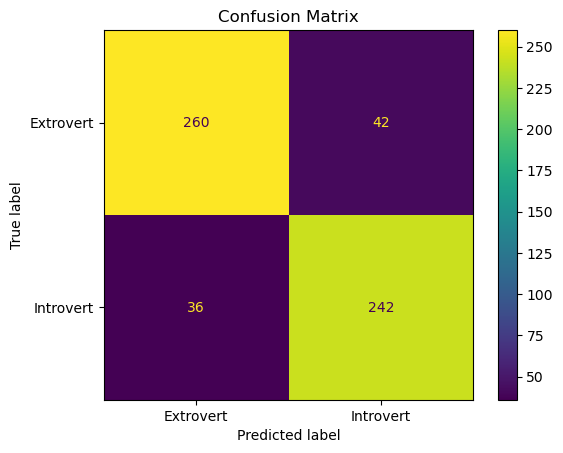

In [57]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()